In [276]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_v2_behavior()

In [277]:
class ScratchVR(object):
    def __init__(self, epsilon=0.1):
        self.epsilon = epsilon
        
    def fit(self, X, y, epochs=200, learning_rate=0.1):
        self.sess = tf.Session()
        
        feature_len = X.shape[-1] if len(X.shape) > 1 else 1
        
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
        if len(y.shape) == 1:
            y = y.values.reshape(-1, 1)
            
            
        self.We = tf.Variable(tf.random_normal(shape=(feature_len, 1)))
        self.be = tf.Variable(tf.random_normal(shape=(1,)))
        
        self.X = tf.placeholder(dtype=tf.float32, shape=(None, feature_len))
        self.y = tf.placeholder(dtype=tf.float32, shape=(None, 1))
        
        self.y_pred = tf.matmul(self.X, self.We) + self.be
        
        self.loss = tf.norm(self.We)/2 + tf.reduce_mean(tf.maximum(0., tf.abs(self.y_pred - self.y) - self.epsilon))
        
        optimize = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=learning_rate)
        go = optimize.minimize(self.loss)

        self.sess.run(tf.global_variables_initializer())
        
        
        for i in range(epochs):
            loss = self.sess.run(
                self.loss, 
                {
                    self.X: X,
                    self.y: y
                }
            )
            self.sess.run(
                go, 
                {
                    self.X: X,
                    self.y: y
                }
            )
            
        return self
            
    def predict(self, X, y=None):
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
            
        y_pred = self.sess.run(
            self.y_pred, 
            {
                self.X: X 
            }
        )
        return y_pred

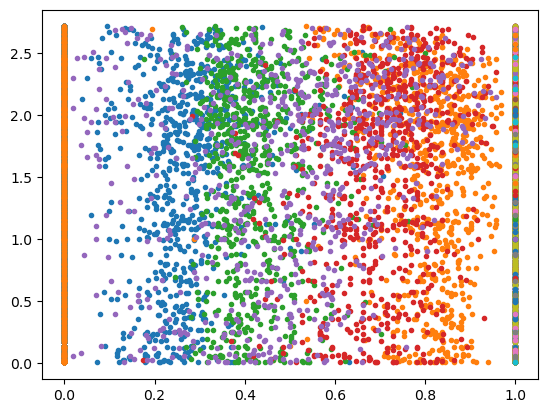

In [283]:
df = pd.read_csv('test.csv')
#print(dff.head())
x = df.drop(columns=['profit_margin'])
y = df['profit_margin']
plt.plot(x, y,".")

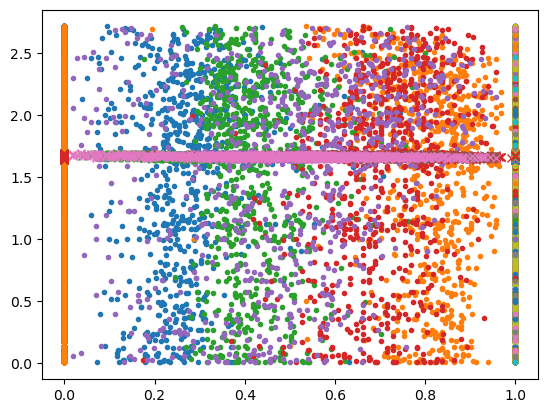

In [282]:
model = ScratchVR(epsilon=0.1)
model.fit(x, y)
plt.plot(
    x, y, ".",
    x, model.predict(x), "x"
)

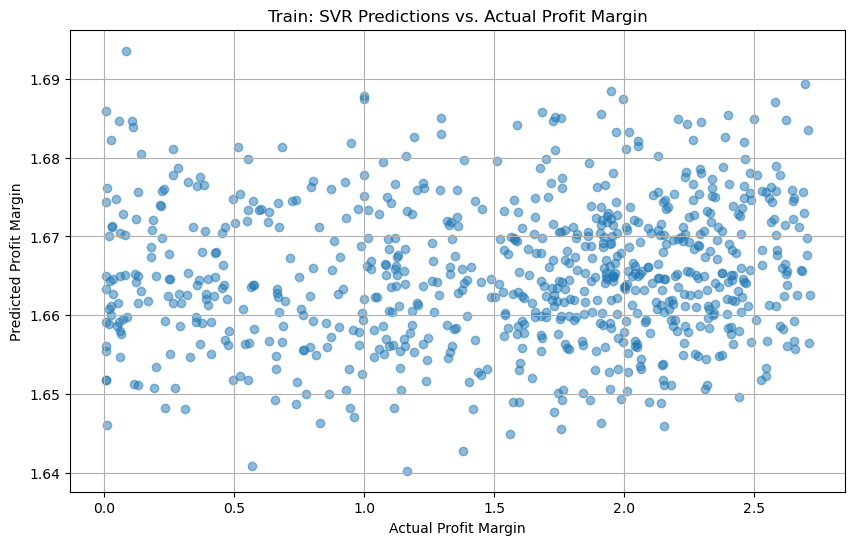

MSE: 0.6161920083577592
RMSE: 0.7849789859338652
MAE: 0.6471224681277917


In [285]:

check = pd.read_csv('test.csv')
y_pred_train = model.predict(x)
Y_train = check['profit_margin']

rmse = np.sqrt(mean_squared_error(Y_Train, y_pred_train))
mae = mean_absolute_error(Y_Train, y_pred_train)
mse = mean_squared_error(Y_Train, y_pred_train)

plt.figure(figsize=(10, 6))
plt.scatter(Y_Train, y_pred_train, alpha=0.5)
plt.xlabel("Actual Profit Margin")
plt.ylabel("Predicted Profit Margin")
plt.title("Train: SVR Predictions vs. Actual Profit Margin")
plt.grid(True)
plt.show()  

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')